<a href="https://colab.research.google.com/github/sangeetha62/Machine-learning/blob/main/Insurance_file_self_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of 
# individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals 
# that help medical insurance to make decision on charging the premium.

In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
df=pd.read_csv("/content/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.shape

(1338, 7)

In [ ]:
# checking for missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


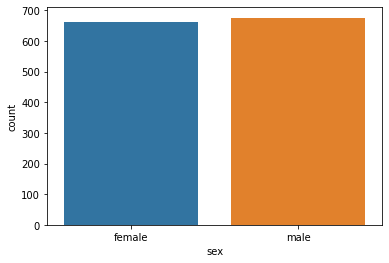

In [ ]:
# DATA VISUALIZATION

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['sex'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


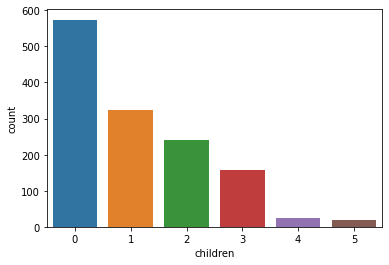

In [ ]:
sns.countplot(df['children'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


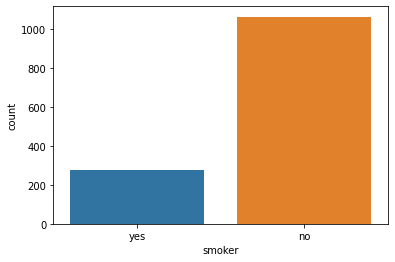

In [ ]:
sns.countplot(df['smoker'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


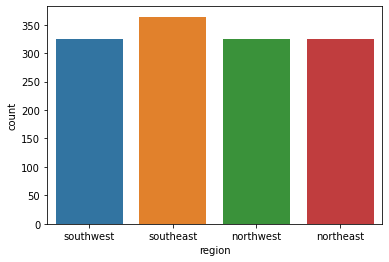

In [ ]:
sns.countplot(df['region'])

In [ ]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


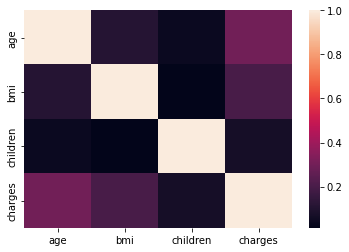

In [ ]:
sns.heatmap(df.corr())

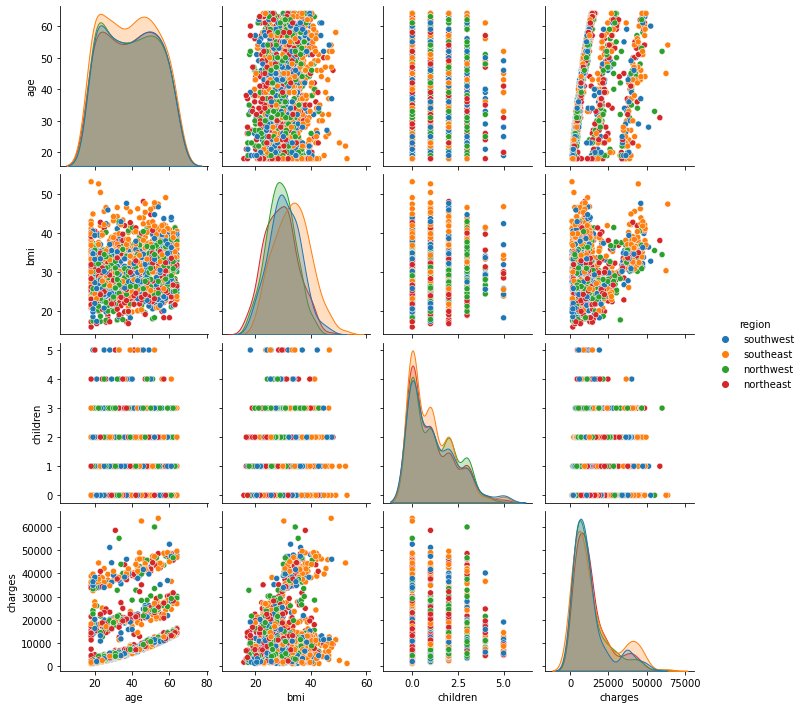

In [ ]:
sns.pairplot(df,hue='region')

In [ ]:
# checking of datatypes
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# encoding using getdummy
dummy=pd.get_dummies(df[['sex','smoker','region']],drop_first=True)
dummy

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
1333,1,0,1,0,0
1334,0,0,0,0,0
1335,0,0,0,1,0
1336,0,0,0,0,1


In [ ]:
dfnew=pd.concat([df,dummy],axis=1)
dfnew

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0,1


In [ ]:
dfnew=dfnew.drop(['sex','smoker','region'],axis=1)
dfnew

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [ ]:
# separating x and y
x=dfnew.drop(['charges'],axis=1)
y=dfnew[['charges']]

In [ ]:
# training and testing datas
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
# model creation
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([[ 9.01636753e+03],
       [ 7.01997635e+03],
       [ 3.68708343e+04],
       [ 9.51853774e+03],
       [ 2.69740308e+04],
       [ 1.10808462e+04],
       [-4.06177600e+01],
       [ 1.71922331e+04],
       [ 9.74950536e+02],
       [ 1.13299594e+04],
       [ 2.80574861e+04],
       [ 9.47838799e+03],
       [ 4.98095281e+03],
       [ 3.84564701e+04],
       [ 4.03433327e+04],
       [ 3.71038753e+04],
       [ 1.51982019e+04],
       [ 3.57689693e+04],
       [ 8.88568387e+03],
       [ 3.13835989e+04],
       [ 3.79641903e+03],
       [ 1.02628964e+04],
       [ 2.37593679e+03],
       [ 7.26280819e+03],
       [ 1.12875675e+04],
       [ 1.31383480e+04],
       [ 1.46241614e+04],
       [ 6.07324604e+03],
       [ 1.00361537e+04],
       [ 1.97927814e+03],
       [ 9.07103928e+03],
       [ 1.31369887e+04],
       [ 4.30868680e+03],
       [ 3.21105955e+03],
       [ 4.48957162e+03],
       [ 1.33774493e+04],
       [ 1.82221028e+03],
       [ 8.79191682e+03],
       [ 3.3

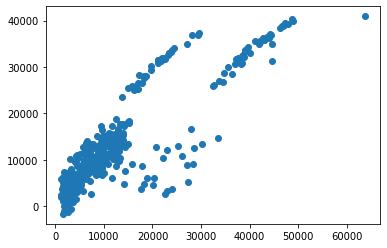

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(y_test,y_pred)
print(error)

4145.450555627597


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
perc_error=mean_absolute_percentage_error(y_test,y_pred)
print(perc_error)

0.43585625991943544


In [ ]:
from sklearn.metrics import mean_squared_error
sq_error=mean_squared_error(y_test,y_pred)
sq_error

33780509.57479164

In [ ]:
from sklearn.metrics import mean_squared_error
z=mean_squared_error(y_test,y_pred)
print(np.sqrt(z)) 

5812.100272258871


In [ ]:
from sklearn.metrics import r2_score    
print("R2-score is",r2_score(y_test,y_pred))

R2-score is 0.7696118054369011
